In [1]:
import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [3]:
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

In [4]:
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob('Datasets/Train/*')


In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [9]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [10]:
import keras
from keras.preprocessing.image import ImageDataGenerator

# Default data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''


Found 1484 images belonging to 10 classes.
Found 192 images belonging to 10 classes.


'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n                         validation_data = test_set,\n                         nb_val_samples = 2000)'

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
47/47 [==============================] - 492s 10s/step - loss: 6.9979 - accuracy: 0.2109 - val_loss: 1.9127 - val_accuracy: 0.4635
Epoch 2/5
47/47 [==============================] - 458s 10s/step - loss: 2.0663 - accuracy: 0.3605 - val_loss: 1.8877 - val_accuracy: 0.4479
Epoch 3/5
47/47 [==============================] - 456s 10s/step - loss: 1.8934 - accuracy: 0.4252 - val_loss: 2.4748 - val_accuracy: 0.3958
Epoch 4/5
47/47 [==============================] - 459s 10s/step - loss: 1.7338 - accuracy: 0.4575 - val_loss: 1.4606 - val_accuracy: 0.5990
Epoch 5/5
47/47 [==============================] - 448s 10s/step - loss: 1.6867 - accuracy: 0.4683 - val_loss: 2.0581 - val_accuracy: 0.4479


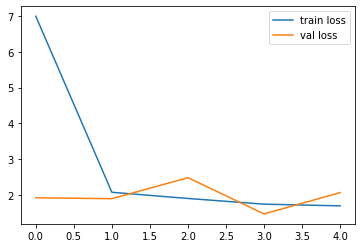

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [11]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
import tensorflow as tf

from keras.models import load_model

model.save('aayuResNet.h5')